In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
X_1_full = pd.read_excel('C:\\Users\\Владимир\\ВКР\\X_bp.xlsx') 
X_2_full = pd.read_excel('C:\\Users\\Владимир\\ВКР\\X_nup.xlsx')

**Производим объединение файлов**

In [7]:
X_all = X_1_full.merge(X_2_full, left_index=True, right_index=True)

In [9]:
Compozit = X_all.copy()
Compozit

,id_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",id_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,0,4.000000,57.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,1,0,4.000000,60.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,2,0,4.000000,70.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,3,0,5.000000,47.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,4,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1018,90,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1019,90,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1020,90,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1021,90,6.313201,58.261074


**Приверим датасет на заполненность и типы данных в нем.**

In [313]:
Наличие_пропусков = pd.DataFrame({
    "Тип данных": Compozit.dtypes,
    "Количество_пропусков": Compozit.isnull().sum(),
    "Количесвто_уникальных_значений": Compozit.nunique()
}).sort_values(by="Количество_пропусков", ascending=False)

Наличие_пропусков ['Процент_пропусков'] = round(Наличие_пропусков['Количество_пропусков'] / len(Compozit),2)

Наличие_пропусков

,Тип данных,Количество_пропусков,Количесвто_уникальных_значений,Процент_пропусков
id_x,int64,0,1023,0.0
Соотношение матрица-наполнитель,float64,0,1014,0.0
"Плотность, кг/м3",float64,0,1013,0.0
"модуль упругости, ГПа",float64,0,1020,0.0
"Количество отвердителя, м.%",float64,0,1005,0.0
"Содержание эпоксидных групп,%_2",float64,0,1004,0.0
"Температура вспышки, С_2",float64,0,1003,0.0
"Поверхностная плотность, г/м2",float64,0,1004,0.0
"Модуль упругости при растяжении, ГПа",float64,0,1004,0.0
"Прочность при растяжении, МПа",float64,0,1004,0.0


<Axes: >

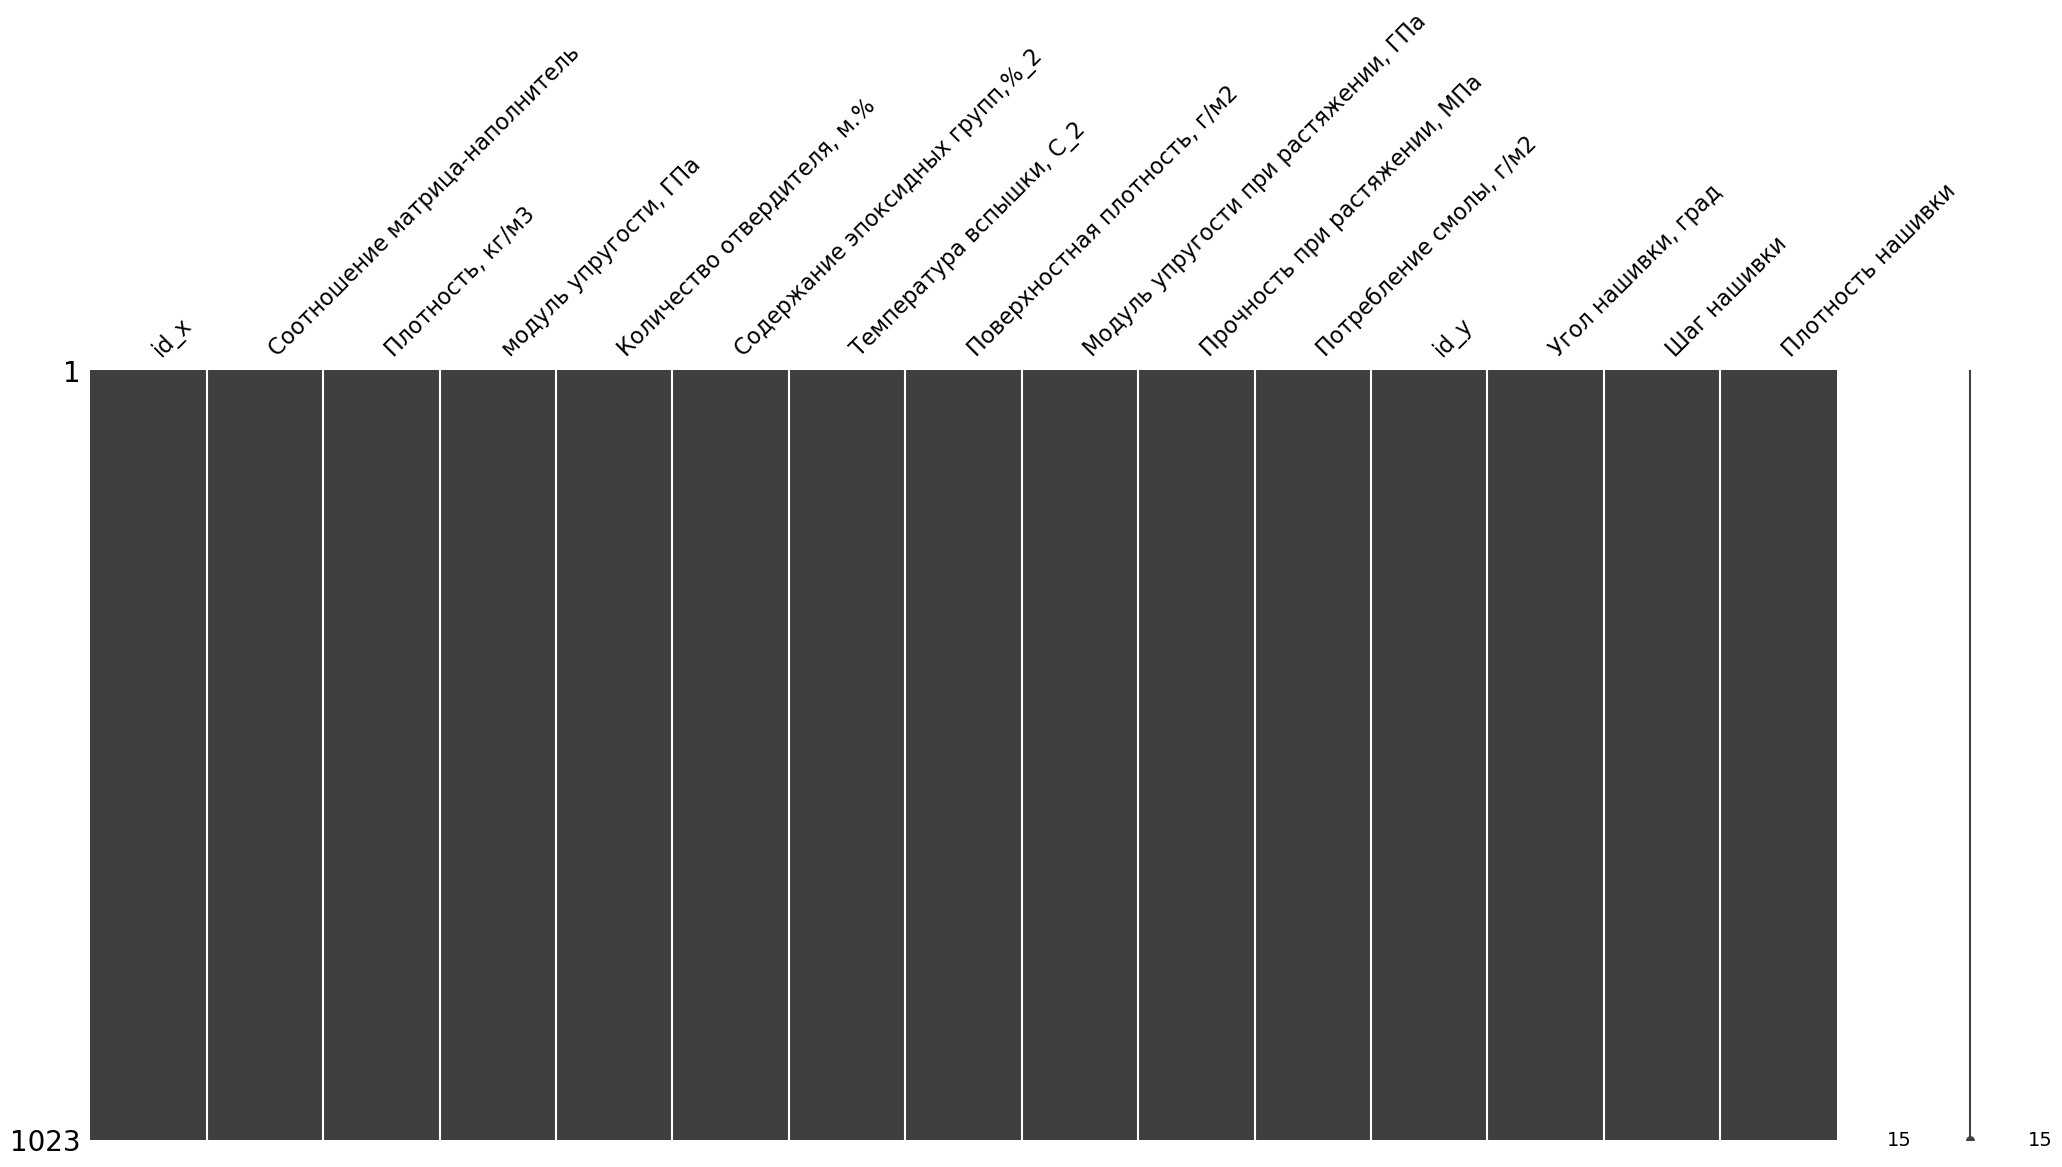

In [315]:
msno.matrix(Compozit)

**Столбцы "id_x"и "id_y" можно удалить, т.к. они не содержат полезной информации, в них указан порядковый номер строк.**

In [43]:
Compozit.drop(['id_x', 'id_y'], axis=1, inplace=True)

**Построим матрицу корреляций**

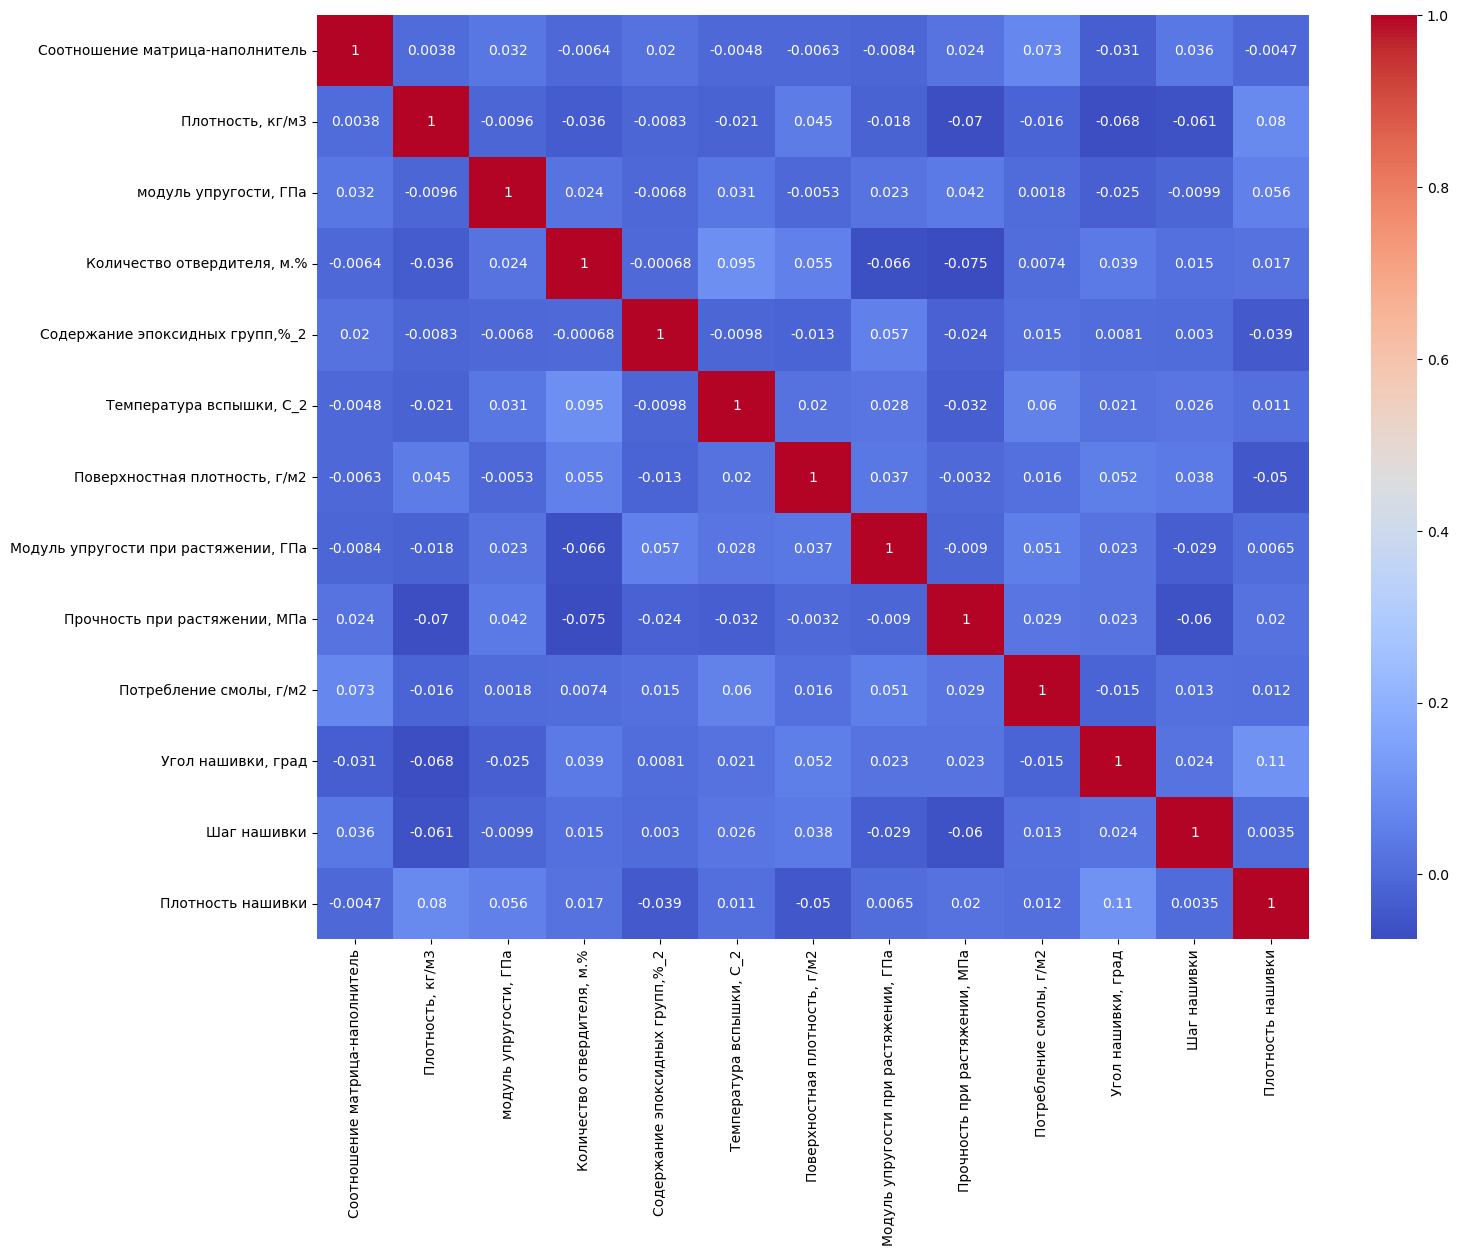

In [321]:
plt.figure(figsize=(16,12))
sns.heatmap(Compozit.select_dtypes('number').corr(), annot=True,cmap='coolwarm')
plt.show()

In [322]:
Compozit.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


**Пострим таблицу рассенивания значений**

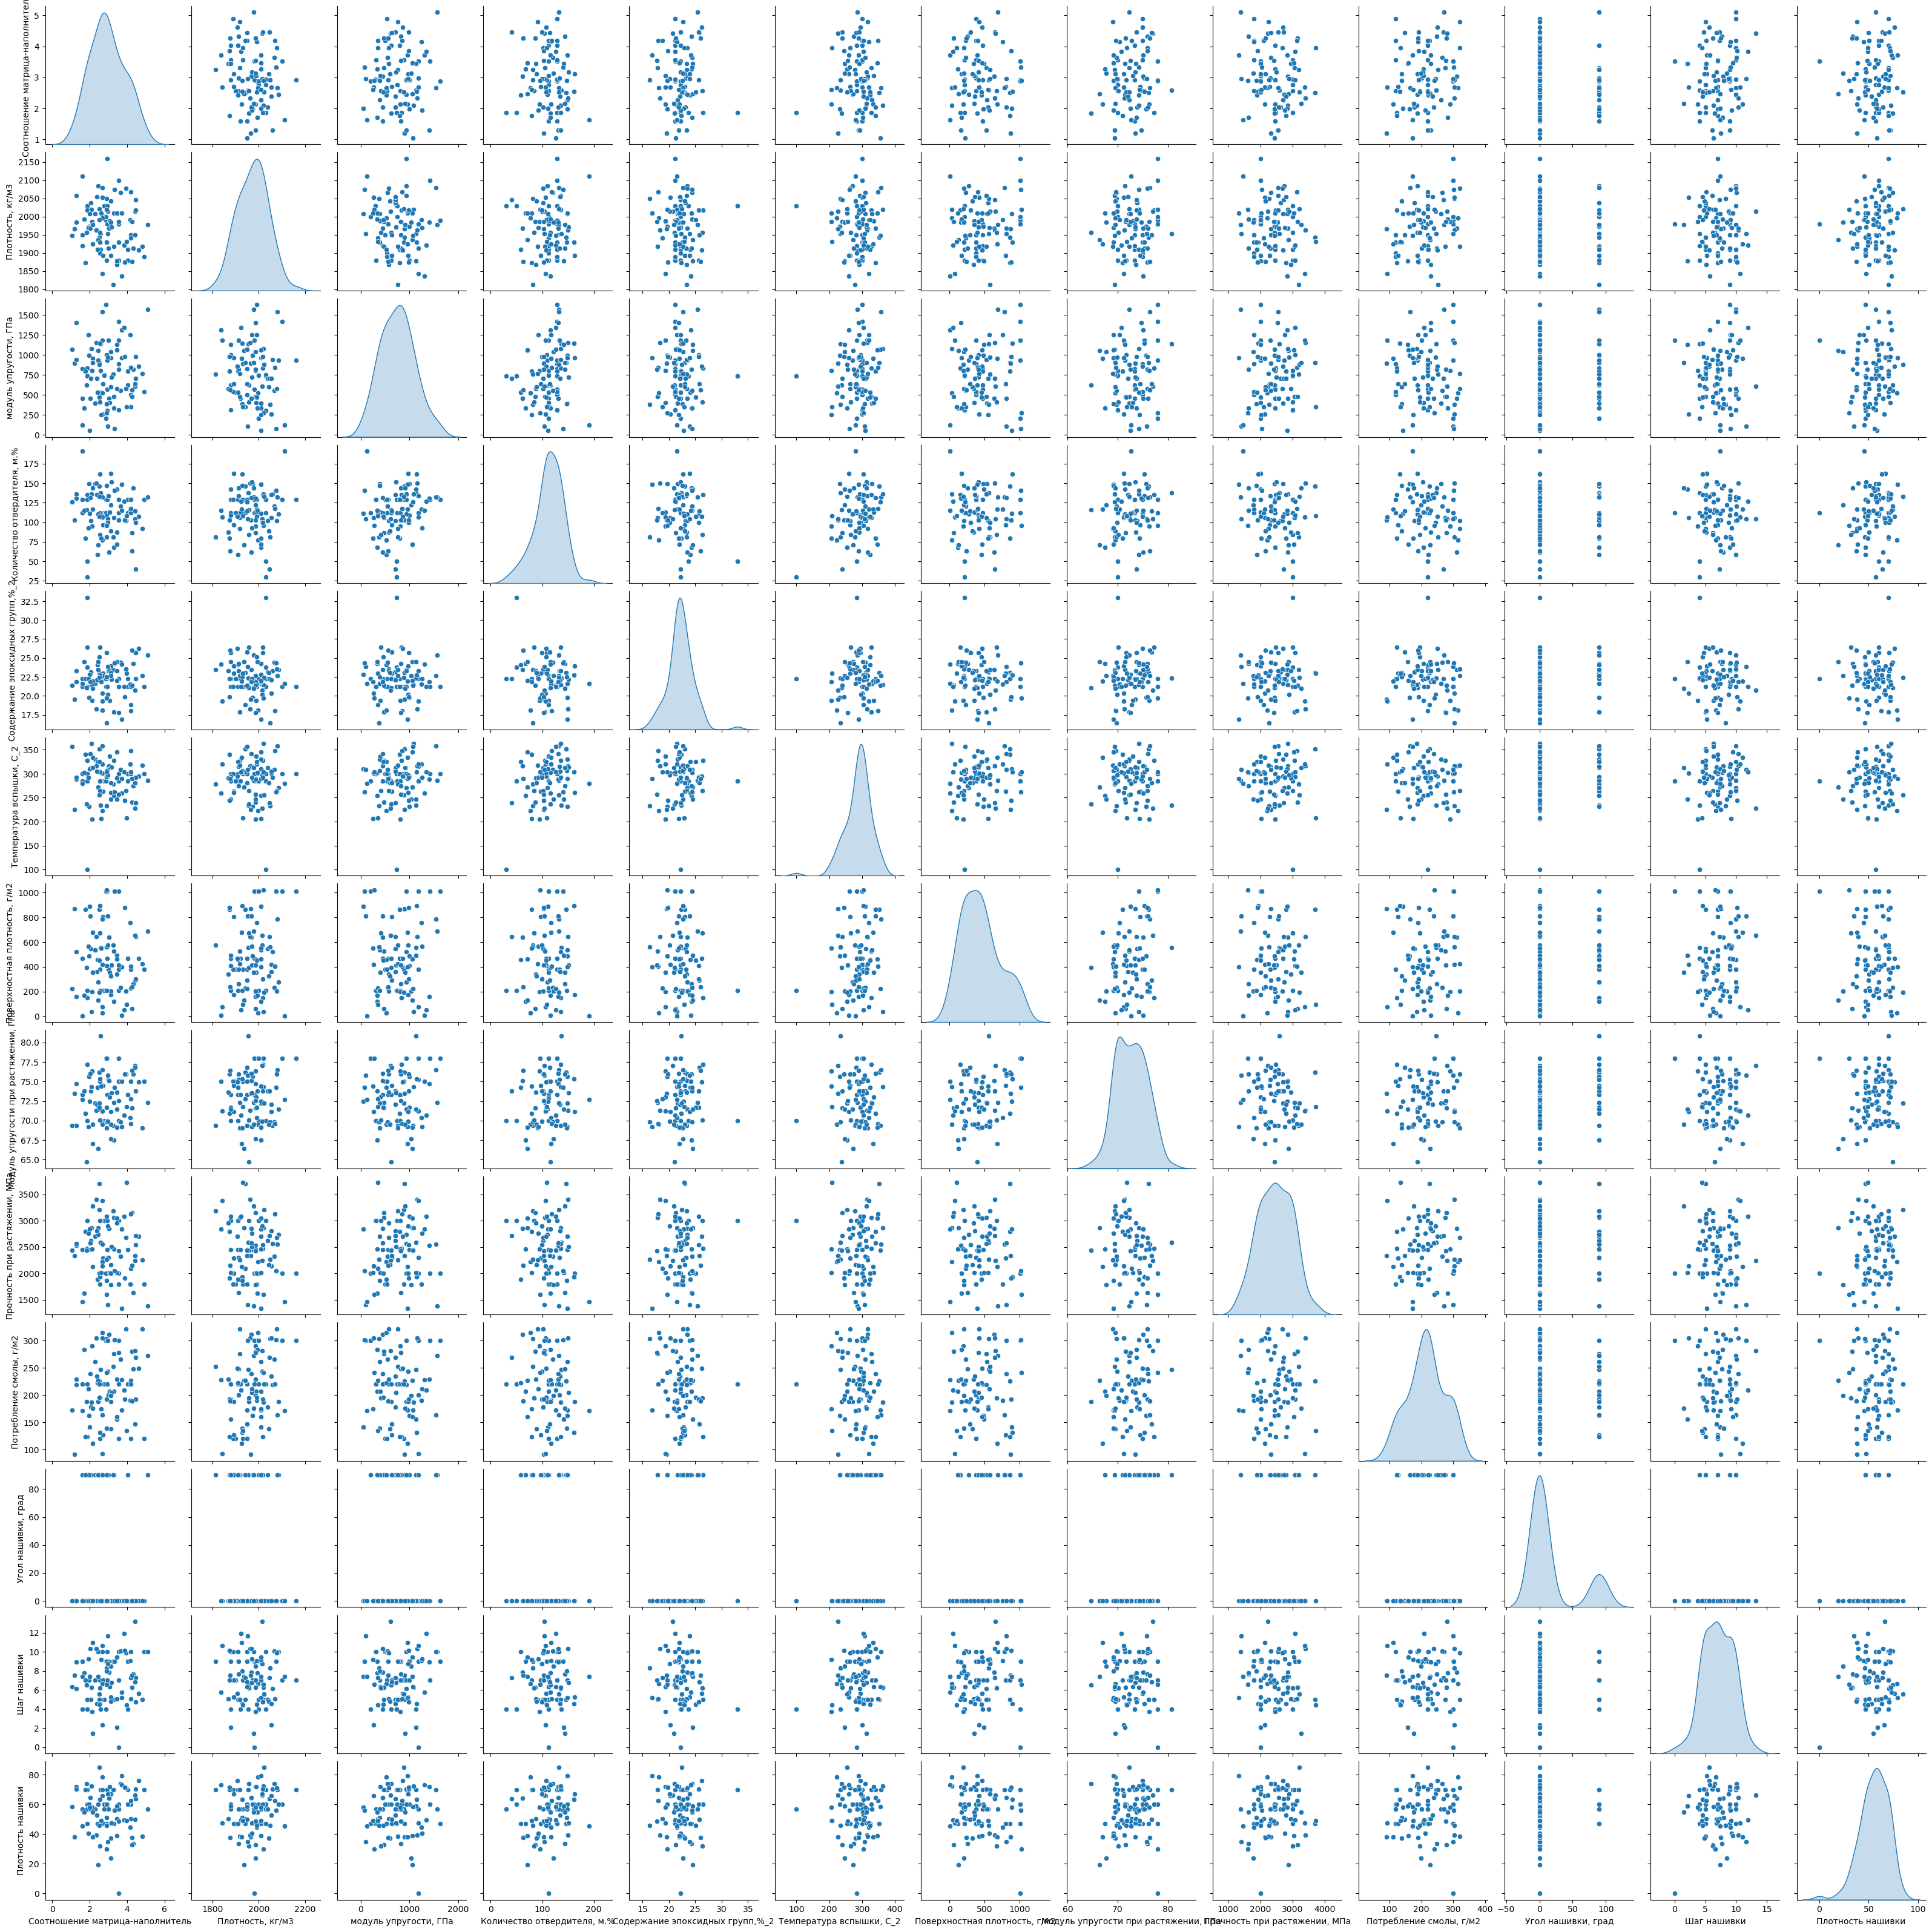

In [326]:
sns.pairplot(Compozit.head(100), diag_kind='kde')
plt.show()

**Построим "ящики с усами"**

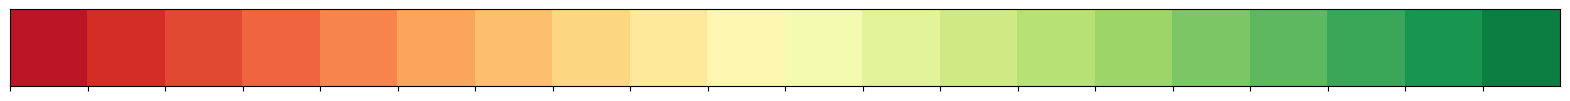

In [45]:
selected_palette = sns.color_palette("RdYlGn", n_colors=20)

sns.palplot(selected_palette)
plt.show()

In [47]:
columns = Compozit.columns

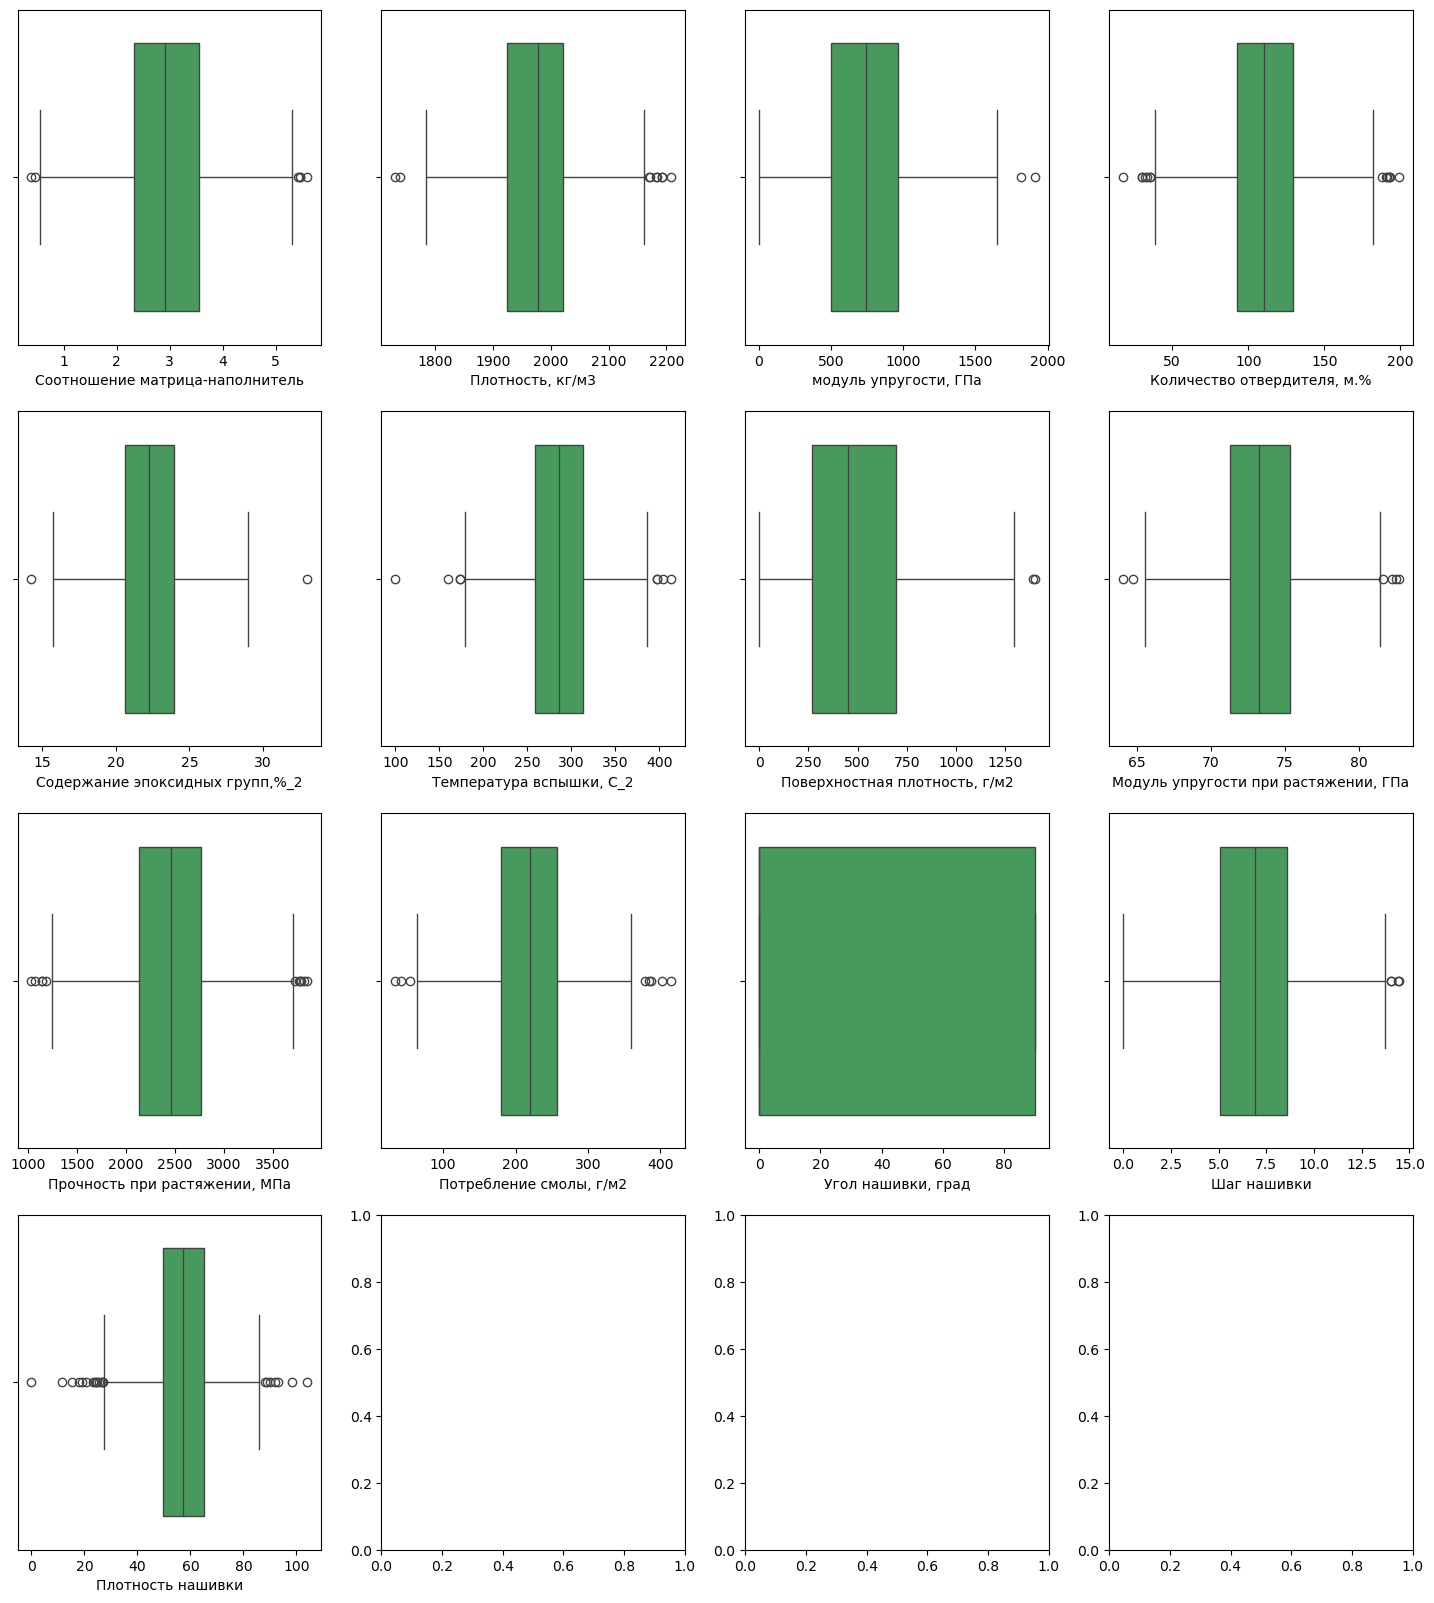

In [49]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 20))  

for ax, columns in zip(axes.flat, columns):
    sns.boxplot(x= Compozit [columns], ax=ax, color=selected_palette[17])
  

plt.show()

**Просмотр и обработка выбросов**

In [332]:
for col in Compozit.columns:
    q1 = Compozit[col].quantile(0.25)
    q3 = Compozit[col].quantile(0.75)
    iqr = q3 - q1
    Compozit.loc[Compozit[col] < q1 - 1.5 * iqr,col] = np.nan
    Compozit.loc[Compozit[col] > q3 + 1.5 * iqr,col] = np.nan
    

In [333]:
pd.DataFrame(Compozit.isna().mean().rename('Outliers percentage')).apply(lambda x: 100 * x)

,Outliers percentage
Соотношение матрица-наполнитель,0.586510
"Плотность, кг/м3",0.879765
"модуль упругости, ГПа",0.195503
"Количество отвердителя, м.%",1.368524
"Содержание эпоксидных групп,%_2",0.195503
"Температура вспышки, С_2",0.782014
"Поверхностная плотность, г/м2",0.195503
"Модуль упругости при растяжении, ГПа",0.586510
"Прочность при растяжении, МПа",1.075269
"Потребление смолы, г/м2",0.782014


**Количество выбросов в разрезе каждого парпметра низкое. Их можно удалить.**

In [335]:
Compozit = Compozit.dropna()

In [4]:
Compozit 

По итогу выше проведенного разведочного анализа:
1. В датасете все поля заполнены;
2. Все поля имеют числовой формат;
3. Только у одного параметра "Угол нашивки, град" 2 значения. Т.к. эти значения не являются категориями, и они отражают разность, принято решение  перекодировать их.
4. Между параметрами очень слабая корреляция.
5. Практически для всех знаяений высокая плотность показателей в центре.
6. Во всех столбцах преобладают нецеллочисленные значения.
7. Параметр "Угол нашивки, град" имеет только 2 значения. Т.к. между значениями есть явная разнница, то для кодирования будет использован метод LabelEncoder.
8. Количество выбросов состаило 87 записей. Т.к. небольшая часть, то они были удалены.
В рамках уточнений была получена информация, что в датасете есть синтетические данные. \
Синтетические данные в машинном обучении — это искусственно созданные данные, которые сохраняют статистические и структурные свойства реальной информации, но при этом не содержат фактических сведений из окружающего мира. \
Проведем работы в части оценки количества синтетических данных в датасете. В датасете очеь много нецелочисленныхых чисел.

Внесем правки в поле "Угол нашивки, град". 

In [339]:
from sklearn.preprocessing import LabelEncoder

In [340]:
labelencoder = LabelEncoder()

In [341]:
Compozit ['Угол нашивки, град'] = labelencoder.fit_transform(Compozit ['Угол нашивки, град'])

In [342]:
Compozit 

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [343]:
def has_zero_fraction(value):
    decimal_part = str(float(value)).split('.')[1]
    return int(decimal_part) == 0
    
zero_decimal_count = {}

for column in Compozit.columns:
    zero_decimal_count[column] = sum(map(has_zero_fraction, Compozit[column]))

for column, count in zero_decimal_count.items():
    print(f"В столбце '{column}' найдено {count} строк.")

В столбце 'Соотношение матрица-наполнитель' найдено 0 строк.
В столбце 'Плотность, кг/м3' найдено 20 строк.
В столбце 'модуль упругости, ГПа' найдено 18 строк.
В столбце 'Количество отвердителя, м.%' найдено 13 строк.
В столбце 'Содержание эпоксидных групп,%_2' найдено 0 строк.
В столбце 'Температура вспышки, С_2' найдено 12 строк.
В столбце 'Поверхностная плотность, г/м2' найдено 20 строк.
В столбце 'Модуль упругости при растяжении, ГПа' найдено 15 строк.
В столбце 'Прочность при растяжении, МПа' найдено 15 строк.
В столбце 'Потребление смолы, г/м2' найдено 20 строк.
В столбце 'Угол нашивки, град' найдено 936 строк.
В столбце 'Шаг нашивки' найдено 37 строк.
В столбце 'Плотность нашивки' найдено 37 строк.


Строк, в которых все параметры являются целыми мало. Исключение 'Угол нашивки, град'. \
Создадим датасет с целыии значениями. Т.к. таких записей очень мало, то отбор будет по столбцу 'Плотность нашивки', \
где будут все значения данного столбца.

In [345]:
Compozit_int =Compozit[(Compozit['Шаг нашивки'] % 1) == 0]
Compozit_int

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.0,60.0
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.0,47.0
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.0,57.0
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.0,60.0
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.0,70.0
7,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000,0,7.0,47.0
8,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0,7.0,57.0
9,3.532338,2100.000000,1421.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0,7.0,60.0
10,2.919678,2160.000000,933.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0,7.0,70.0
11,2.877358,1990.000000,1628.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0,9.0,47.0


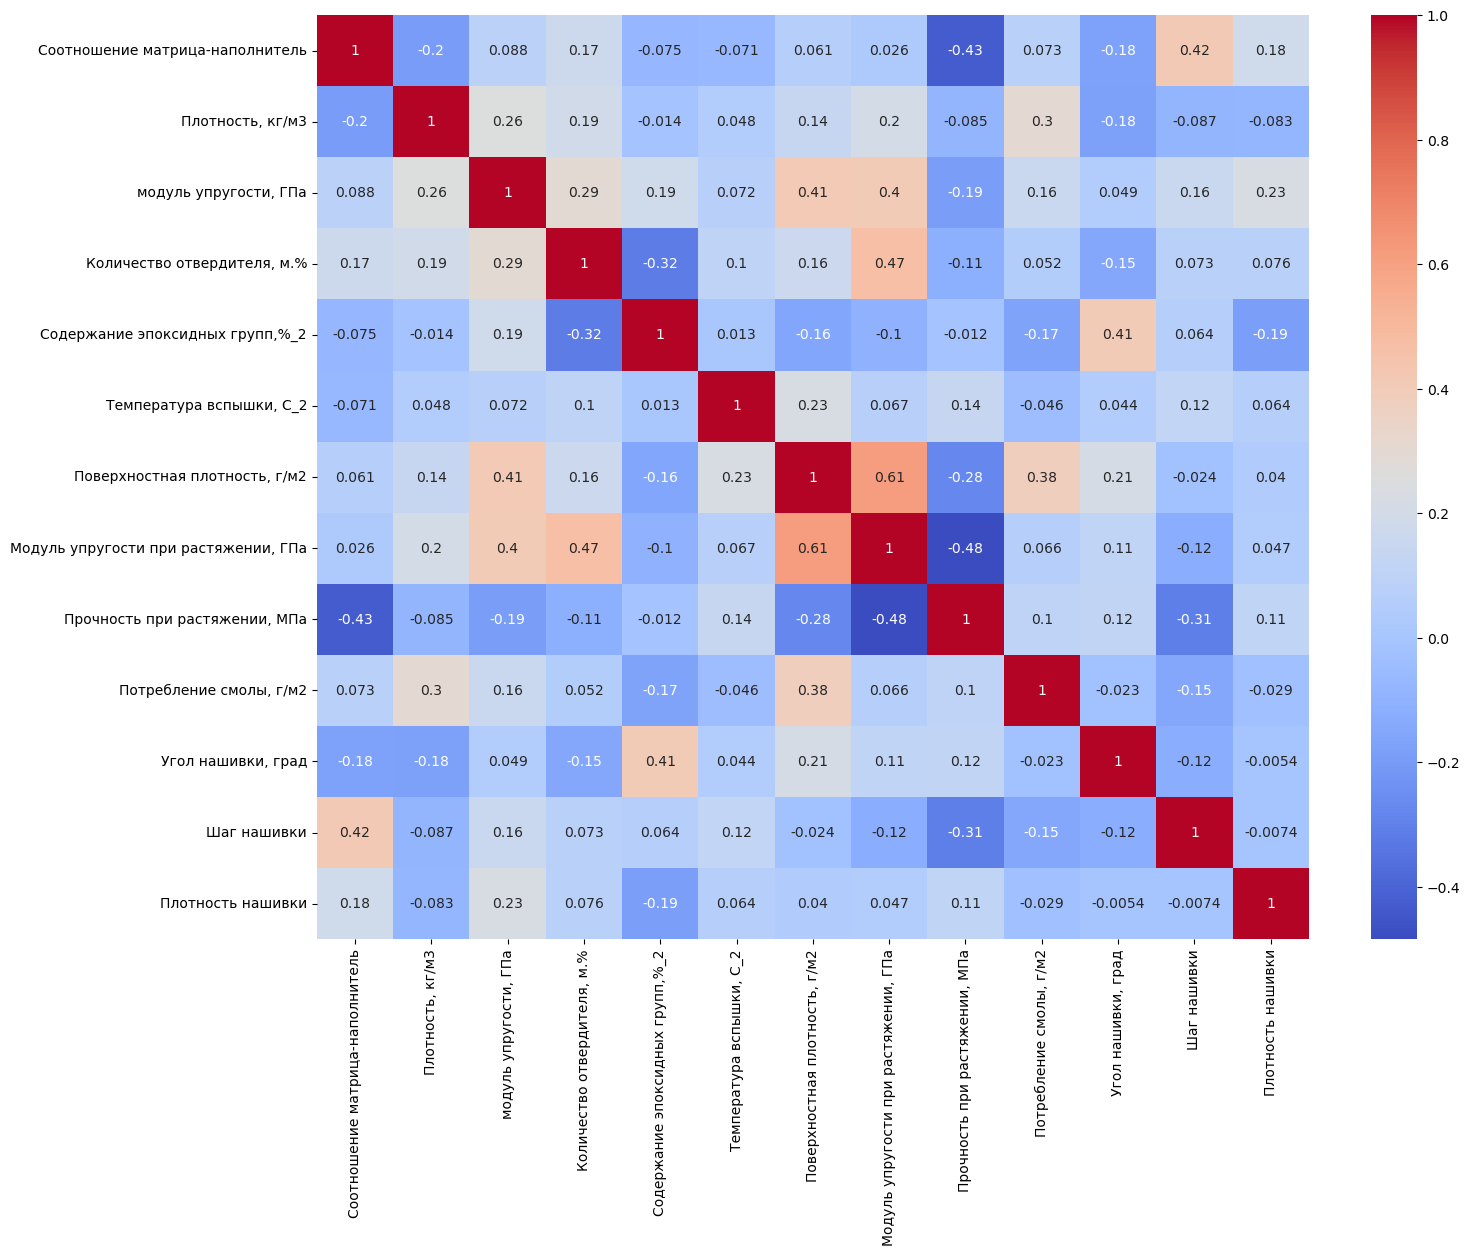

In [346]:
plt.figure(figsize=(16,12))
sns.heatmap(Compozit_int.select_dtypes('number').corr(), annot=True,cmap='coolwarm')
plt.show()

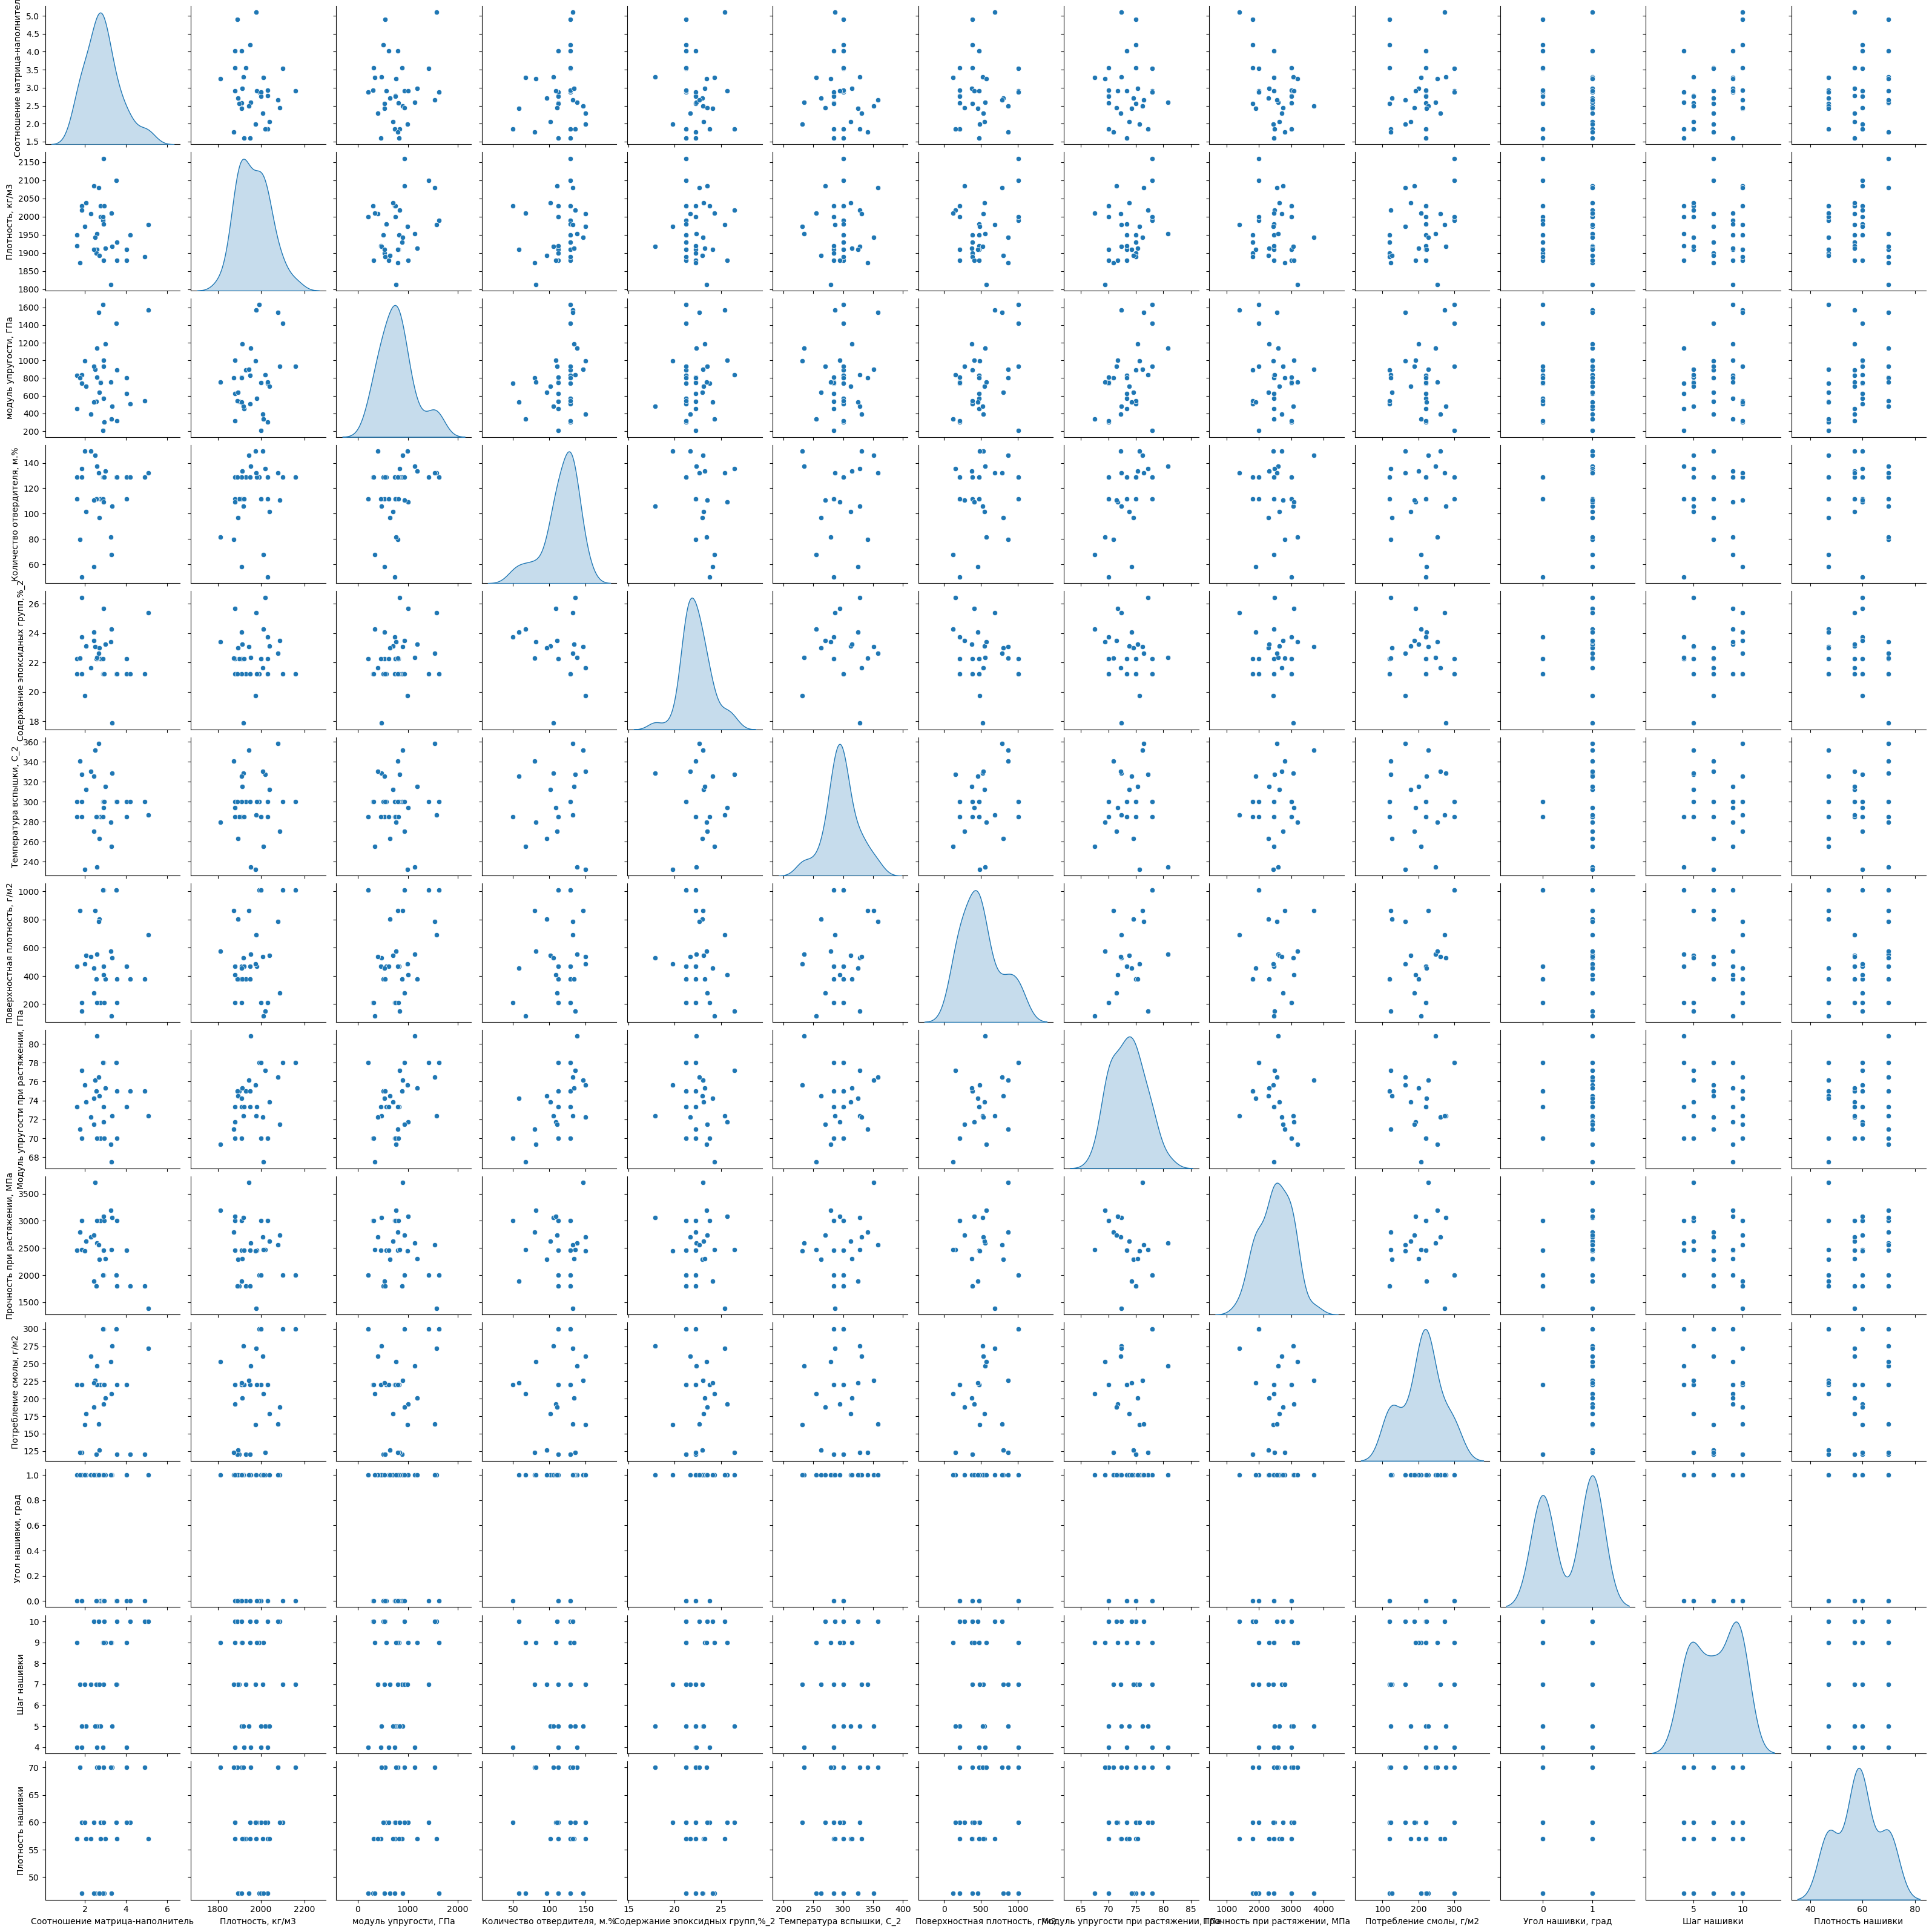

In [347]:
sns.pairplot(Compozit_int.head(100), diag_kind='kde')
plt.show()

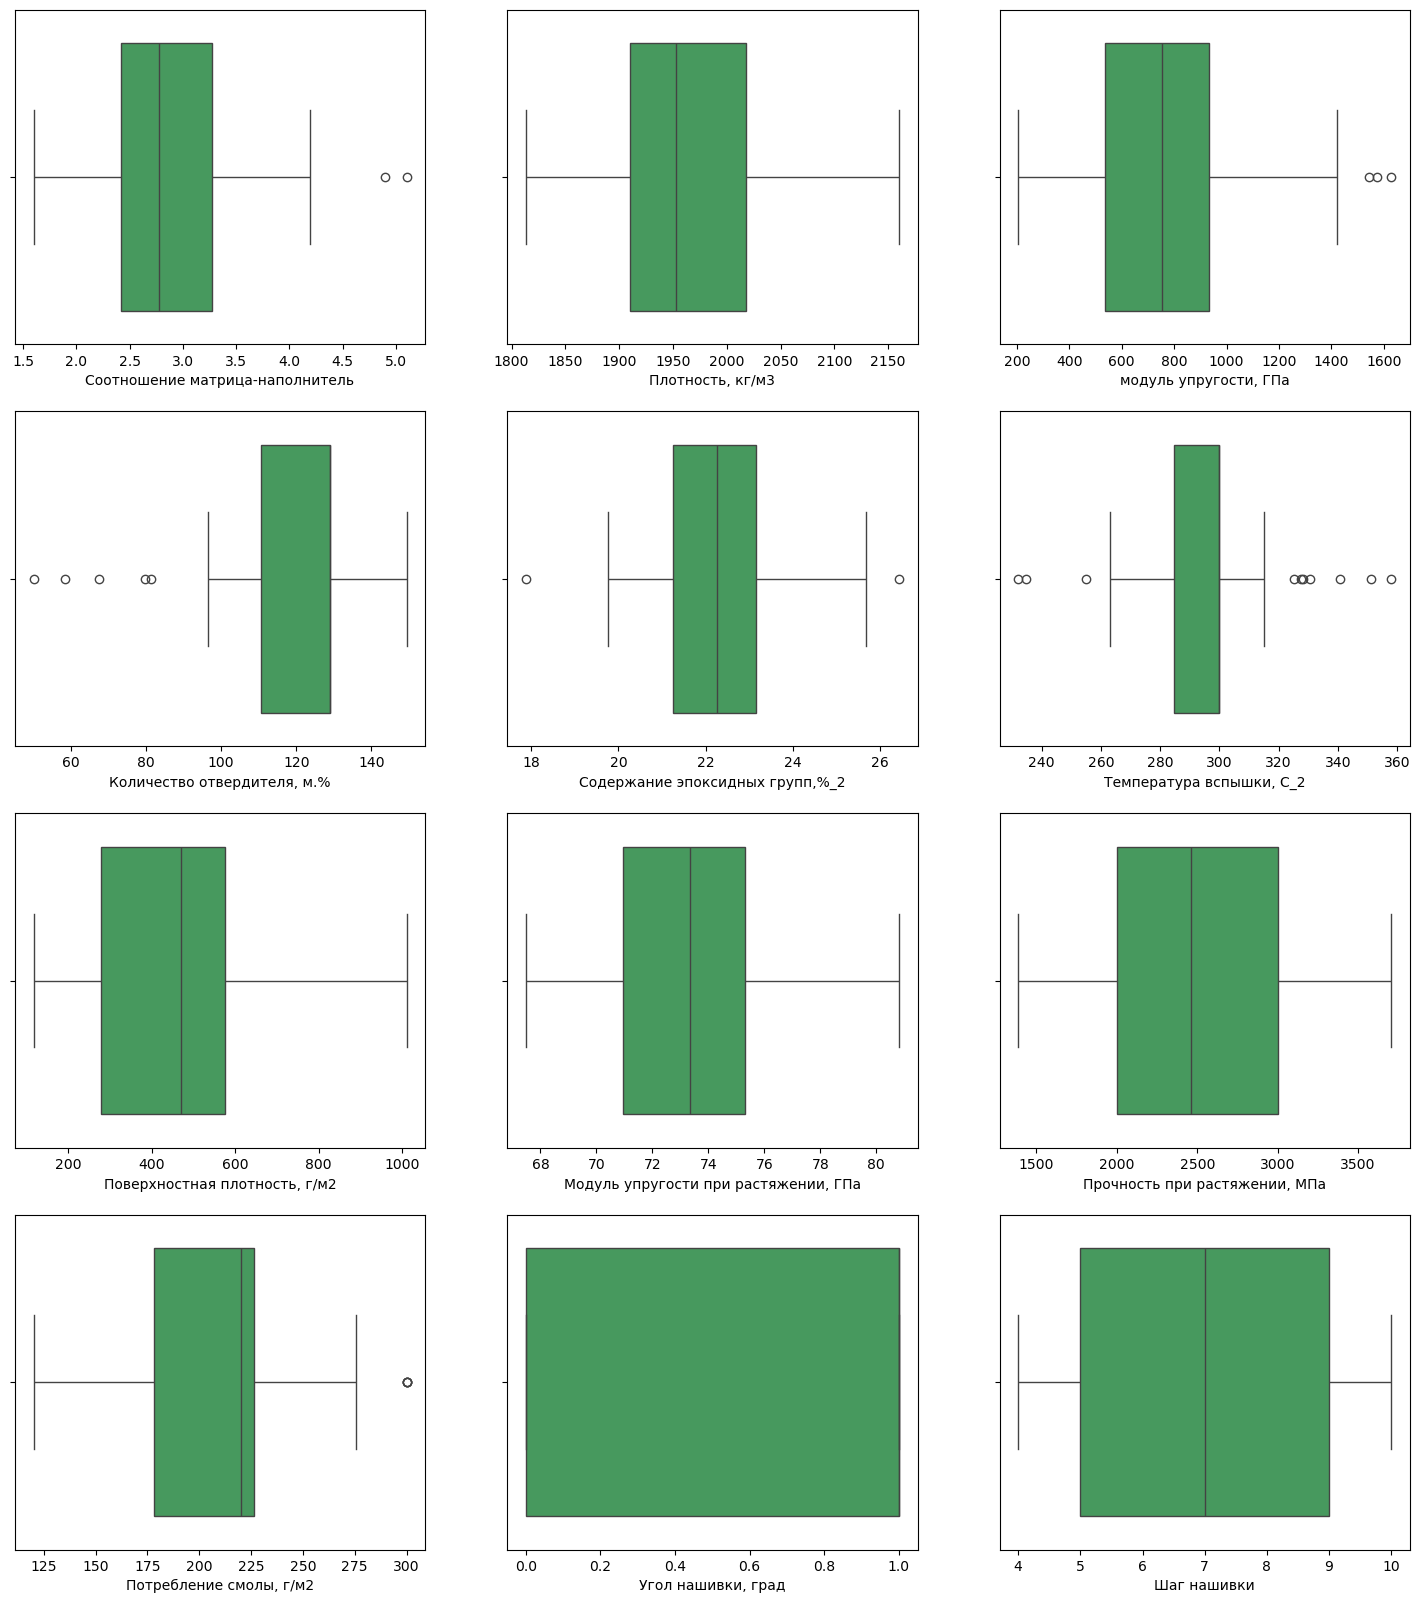

In [370]:
columns_int = Compozit_int.columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))  

for ax, column in zip(axes.flat, columns_int):
    sns.boxplot(x=Compozit_int[column], ax=ax, color=selected_palette[17])

plt.show()

По итогу дополнительного разведочного анализа (отличия от основного датасета):
1. Между параметрами усилилась корреляция.
2. Распределение значений стало более линейным.
3. Выбросы остались, но т.к. строк 37, то их удалять не будем. 

Схраним полученный файл

In [376]:
Compozit_int.to_excel('C:/Users/Владимир/OneDrive/Desktop/работа/Обучение/ВКР/Датасет для ВКР_композиты/Compozit_int.xlsx', index=False)

С учетом полученной информации выше дальшие работы будут продолжены с сохраненным файлом "Compozit_int.xlsx". \
Дальнейшие работы будут выполнены в другом файле "Подбор модели.ipynb".